<a href="https://colab.research.google.com/github/Manasa9391/BDI_CIFAR10/blob/Manasa/CNN_Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING KERAS AND CIFAR-10 DATASET

In [1]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 33s 0us/step


In [2]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


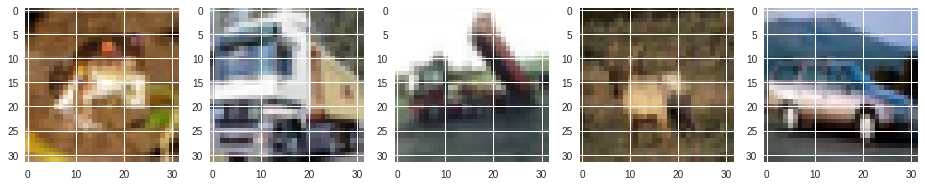

In [3]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

In [0]:
# A simple CNN Model fr CIFAR-10

In [0]:
import keras 
from keras.models import Sequential
from keras.layers import  Conv2D, MaxPooling2D, Dense, Flatten,Dropout,Activation
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
import numpy as np
from keras import regularizers
from keras.datasets import cifar10
from keras.optimizers import SGD 

In [5]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print('Shape of training dataset :',x_train.shape)
print('Shape of testing dataste :' ,x_test.shape)

#formatting the dataset 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

Shape of training dataset : (50000, 32, 32, 3)
Shape of testing dataste : (10000, 32, 32, 3)


In [0]:
len(x_train)

50000

In [0]:
model = Sequential()

weight_decay  = 0.0003
weight_decay_1= 0.0001  
#layer1
model.add(Conv2D(32,(3,3),input_shape=[32,32,3],kernel_regularizer=regularizers.l2(weight_decay_1),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#layer2
model.add(Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer 3
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))


#layer4
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer5


model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#layer6

model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))


In [0]:
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
__________

In [0]:

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                              patience=15, min_lr=0.001)


In [0]:
SGD = SGD(lr=0.01, decay=1e-6, momentum=0.9)

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])



In [0]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_data = (x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 37s 739us/step - loss: 2.2087 - acc: 0.3584 - val_loss: 2.5752 - val_acc: 0.2392
Epoch 2/50
50000/50000 [==============================] - 30s 594us/step - loss: 1.6013 - acc: 0.4770 - val_loss: 1.8548 - val_acc: 0.3854
Epoch 3/50
50000/50000 [==============================] - 30s 603us/step - loss: 1.4289 - acc: 0.5316 - val_loss: 1.7140 - val_acc: 0.4552
Epoch 4/50
50000/50000 [==============================] - 30s 606us/step - loss: 1.2999 - acc: 0.5746 - val_loss: 1.5162 - val_acc: 0.5014
Epoch 5/50
50000/50000 [==============================] - 31s 621us/step - loss: 1.1996 - acc: 0.6119 - val_loss: 1.5234 - val_acc: 0.5101
Epoch 6/50
50000/50000 [==============================] - 30s 601us/step - loss: 1.1282 - acc: 0.6366 - val_loss: 1.2207 - val_acc: 0.6097
Epoch 7/50
50000/50000 [==============================] - 30s 607us/step - loss: 1.0689 - acc: 0.6570 - val_loss: 1.

In [0]:
model.predict(x_test)

array([[7.31808882e-07, 1.60714248e-04, 9.66380248e-05, ...,
        6.76244341e-08, 7.87901718e-06, 1.53458695e-05],
       [6.91453670e-06, 6.34332420e-03, 2.71777569e-08, ...,
        2.18441354e-09, 9.93643045e-01, 6.63303854e-06],
       [1.47919045e-05, 3.77027062e-03, 1.68509916e-06, ...,
        2.67286396e-07, 9.96202886e-01, 7.76229354e-06],
       ...,
       [1.27266239e-05, 3.41095074e-05, 4.75578476e-03, ...,
        9.26571083e-04, 3.11849885e-06, 1.82757758e-05],
       [1.38419057e-06, 9.99980569e-01, 8.53929905e-09, ...,
        4.70233741e-10, 1.71835897e-08, 1.79857925e-05],
       [4.49968465e-11, 1.46887624e-09, 8.63107752e-10, ...,
        9.99990344e-01, 8.94698031e-12, 2.43986567e-11]], dtype=float32)

In [0]:
scores=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 254us/step


In [0]:
scores

[0.47331787767410277, 0.8731]

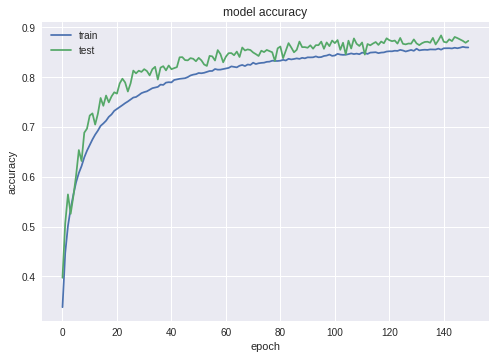

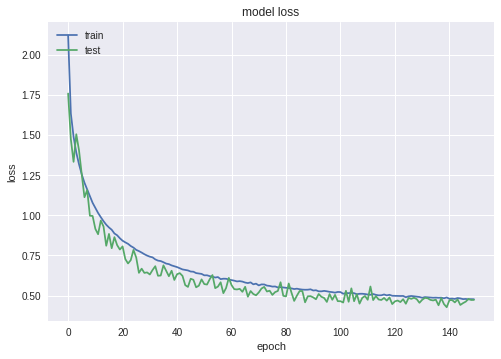

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **EXPERIMENT: 2 -- INCLUDING DATA AUGMENTATION**


In [0]:
def get_model(activation='relu',loss='categorical_crossentropy',optimizer='sgd', epochs = 20):
  model = Sequential()
  
  

  model.add(Conv2D(32,(3,3),input_shape=[32,32,3],padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  #layer2
  model.add(Conv2D(32,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  #layer 3
  model.add(Conv2D(64,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.4))


  #layer4
  model.add(Conv2D(64,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  #layer5


  model.add(Conv2D(128,(3,3),padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  #layer6

  model.add(Conv2D(128,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))
  
  
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Dropout(0.3))
  model.add(Dense(10,activation='softmax'))
  model.summary()
  
  reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                              patience=15, min_lr=0.001)
  
  
  
  #SGD = SGD(lr=0.01, decay=1e-6, momentum=0.9)
  
  model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  
  datagen = ImageDataGenerator(
      
      featurewise_center=False,
      featurewise_std_normalization=False,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip = False)
  
  datagen.fit(x_train)
  
  
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 32, epochs=50,
                    validation_data = (x_test,y_test),callbacks= [reduce_lr])
  
  
  #history = model.fit_generator(x_train, y_train, epochs = 50, batch_size = 64, validation_data = (x_test,y_test))
  
  
  
  
  return model, history
  
  
  
  
  



In [17]:
model1,history1= get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
__________

## **EXPERIMENT 3: KERNEL REGULARIZER- L2**

In [0]:
def get_trained_model(activation='relu',loss='categorical_crossentropy',optimizer='sgd', epochs = 20):
  model = Sequential()
  
  

  weight_decay  = 0.0003
  weight_decay_1= 0.0001  
  #layer1
  model.add(Conv2D(32,(3,3),input_shape=[32,32,3],kernel_regularizer=regularizers.l2(0.0003),padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  #layer2
  model.add(Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  #layer 3
  model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.4))


  #layer4
  model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  #layer5


  model.add(Conv2D(128,(3,3),padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  #layer6

  model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))
  
  
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Dropout(0.3))
  model.add(Dense(10,activation='softmax'))
  model.summary()
  
  reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                              patience=15, min_lr=0.001)
  
  
  
  
  model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  

  
  
  history = model.fit(x_train, y_train, epochs = 50, batch_size = 64, validation_data = (x_test,y_test))
  
  
  
  
  return model, history
  
  
  
  
  



In [22]:
model2, history2 = get_trained_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_31 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_32 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_32 (Activation)   (None, 32, 32, 32)        0         
__________